# Black Scholes formula for European options

Model assumptions: constant interest rates, absence of arbitrage, no dividends, no transaction costs, market completeness. ####################### and under the $\mathbb{Q}$ probability measure the log of stock price is normally distributed and has dynamics

\begin{align}
\frac{dS_t}{S_t} = rdt + σd \hat{W}_t  \nonumber
\end{align}

where $\hat{W}_t$ is a brownian motion under the $\mathbb{Q}$ probability measure. Expanding $dS_t$ via Ito's lemma and integrating both sides leads to the SDE solution 

\begin{align}
S_T = S_t \mathbb{e}^{(r+ \frac{1}{2}σ^2)(T-t) + σ\hat{W}_{(T-t)}}  \nonumber
\end{align}

Following the delta hedging principle, the Black Scholes PDE for the contingent claim V is derived as

\begin{align}
\frac{∂V}{∂t} + rS\frac{∂V}{∂S} + \frac{1}{2}σ^2S^2\frac{∂^2V}{∂S^2} - rV = 0  \nonumber
\end{align}

with boundary condition

\begin{align}
V(S_T, T) = \mathbb{f}(S_T)  \nonumber
\end{align}

where $\mathbb{f}(S_T)$ is the contingent claim payoff function.
Through a change of varibles, the BS PDE can be reduced to the heat equation. Thus, following Feinman-Kac and knowing that $\mathbb{e}^{-rT}V(S_t,t)$ is a local martingale, we know the solution to the BS PDE has the form

\begin{align}
V(S_t, t) = \mathbb{e}^{-r(T-t)}\mathbb{E}_{\mathbb{Q}} [\mathbb{f}(S_T)|\mathcal{F_t}]   \nonumber
\end{align}

where $\mathcal{F_t}$ represents the filtration at time t. Now, let us consider an European Call option written on the stock S with strike K and payoff $C(S_T,T) = max(S_T - K, 0)$. Based on the above argument, the value of the option can be computed as the discounted expectation of the future payoff

\begin{align}  \nonumber
C(S_t, t) & = \mathbb{e}^{-r(T-t)}\mathbb{E}_{\mathbb{Q}} [(S_T - K)^+|\mathcal{F_t}]  \\  \nonumber
& = \mathbb{e}^{-r(T-t)} \mathbb{E}_{\mathbb{Q}} [S_T\mathbb{1}_{(S_T>K)}|\mathcal{F_t}] - \mathbb{e}^{-r(T-t)} \mathbb{E}_{\mathbb{Q}} [K\mathbb{1}_{(S_T>K)}|\mathcal{F_t}] \\  \nonumber
& = \mathbb{e}^{-r(T-t)} \mathbb{E}_{\mathbb{Q}} [S_T\mathbb{1}_{(S_T>K)}|\mathcal{F_t}] - \mathbb{e}^{-r(T-t)} K\mathbb{E}_{\mathbb{Q}} [\mathbb{1}_{(S_T>K)}|\mathcal{F_t}] \\  \nonumber
& = \mathbb{e}^{-r(T-t)} \mathbb{E}_{\mathbb{Q}} [S_T\mathbb{1}_{(S_T>K)}|\mathcal{F_t}] - \mathbb{e}^{-r(T-t)} KN(d2) \\  \nonumber
\end{align}

where $d2 = \frac{log(\frac{S_t}{K} + (r-\frac{σ^2}{2})(T-t)}{σ√(T-t)}$ and $N$ is the standard normal cumulative distribution function. Now, to analyse the $S_T$ term we first introduce a change of measure under the stock numeraire. By the Girsanov theorem there exists a new probability measure $\mathbb{\tilde{Q}}$, equivalent to $\mathbb{Q}$ (i.e. the two measures have the same empty probability set) defined as

\begin{align}
\frac{d\mathbb{\tilde{Q}}}{d\mathbb{Q}} &= \frac{S_T}{\mathbb{E}_{\mathbb{Q}}[S_T |\mathcal{F_t} ]} &= \frac{S_T}{S_t\mathbb{e}^{r(T-t)}}  
& = \frac{S_t \mathbb{e}^{(r+ \frac{1}{2}σ^2)(T-t) + σ\hat{W}_{(T-t)}}}{S_t\mathbb{e}^{r(T-t)}}
& = \mathbb{e}^{(r+ \frac{1}{2}σ^2)(T-t) + σ\hat{W}_{(T-t)}}  \nonumber
\end{align}

where $\frac{d\mathbb{\tilde{Q}}}{d\mathbb{Q}}$ is the Radon Nikodym derivative of $\mathbb{\tilde{Q}}$ w.r.t. $\mathbb{Q}$. Under the new probability measure $\mathbb{\tilde{Q}}$, $\tilde{W}_{t} = \hat{W}_{t} - \sigma t$ is again a brownian motion and the stock dynamics become

\begin{align}
\frac{dS_t}{S_t} = rdt + σd \hat{W}_t = (r+σ^2)dt + σd \tilde{W}_{t}  \nonumber
\end{align} 

Thus,

\begin{align}  \nonumber
\mathbb{e}^{-r(T-t)} \mathbb{E}_{\mathbb{Q}} [S_T\mathbb{1}_{(S_T>K)}|\mathcal{F_t}] &= \mathbb{e}^{-r(T-t)}\mathbb{E}_{\mathbb{\tilde{Q}}} [\frac{d\mathbb{\tilde{Q}}} {d\mathbb{Q}}S_T\mathbb{1}_{(S_T>K)}|\mathcal{F_t}] \\  \nonumber

& =e^{-r(T-t)} \mathbb{E}^{\tilde{\mathbb{Q}}}\left[\left.\frac{e^{r(T-t)} S_t}{S_T} S_T \mathbb{1}_{(S_T>K)} \right\rvert\, \mathcal{F_t}\right] \\  \nonumber
& =S_t \tilde{\mathbb{Q}}\left(S_T>K \mid \mathcal{F_t}\right) = S_t N(d1)  \nonumber
\end{align}

where $d1 = d2 + σ(T-t)$. $N(d1)$ and $N(d2)$ are the risk neutral probabilities of $S_T> K$ under the two numeraires. Finally, the Call option price is

\begin{align}
C(S_t, t) = S_t N(d1) - K \mathbb{e}^{-r(T-t)} N(d2)  \nonumber
\end{align}

In [2]:
import numpy as np
import scipy.stats as ss

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# Pricing function
def BlackScholes(contract_type, S0, K, T, r, sig):
    '''Black Scholes closed form solution for the BS PDE'''
    d1 = (np.log(S0/K) + (r + 0.5*sig**2)*T ) / (sig*np.sqrt(T))
    d2 = (np.log(S0/K) + (r - 0.5*sig**2)*T ) / (sig*np.sqrt(T))

    if contract_type == "call":
        return S0 * ss.norm.cdf(d1) - K * np.exp(-r*T) * ss.norm.cdf(d2)
    
    elif contract_type == "put":
        return K * np.exp(-r*T) * ss.norm.cdf(-d2) - S0 * ss.norm.cdf(-d1)

    else: 
        raise ValueError("Set either 'call' or 'put' ")

In [ ]:
# Input parameters
S0 = 100.00 # Stock price
K = 100.00 # Strike
T = 1.0 # Maturity 1 year
r = 0.04 # Risk free rate based on 10-year US Tresury Yield
sig = 0.2 # Volatility

In [12]:
call = BlackScholes("call", S0, K, T, r, sig)
put = BlackScholes("put", S0, K, T, r, sig)
print("Call price {}".format(call))
print("Put price {}".format(put))

Call price 9.925053717274437
Put price 6.003997632506753


# Put call parity

\begin{align}
C - P = S_0 - K𝑒^{-rT}
\end{align}

In [14]:
print("Put price via put call paritiy", call + K * np.exp(-r*T) - S0)

Put price via put call paritiy 6.003997632506753


# Monte Carlo method

The Monte Carlo is a simulation method based on the Weak Law of Large Numbers (WLLN), which states that if you consider a random variable $X$ with $\mathbb{E}(X) = m$ and $var(X) = σ^2 < ∞$, assuming you can produce $n$ independent random draws of $X: x_1, x_2, ... , x_n$ then

\begin{align}\nonumber
U_n = \frac{(x_1 + ... + x_n)}{n} \overset{p} \to & m \\
\mathbb{P}(|U_n - m|> ϵ)  \to & 0 \quad as \quad n \to ∞, ∀  ϵ>0 \nonumber
\end{align}

Thanks to Metropolis et al. (1950), this result can be extended to reasonably behaved functions $\mathbb{f}: \mathbb{R}\to\mathbb{R}$:

\begin{align}\nonumber
\mathbb{E}[f(x)] ≈ \frac{f(x_1) + ... + f(x_n)}{n}
\end{align}

In this context, I will generate $N$ random draws of the variable 

\begin{align}\nonumber
S^i_T = S_t \mathbb{e}^{(r+ \frac{1}{2}σ^2)(T-t) + σ\hat{W}^i_{(T-t)}}  \nonumber
\end{align}

then, compute the option price as the average of the final payoff of each simulation

\begin{align}\nonumber
V(S_t, t) = \mathbb{e}^{-r(T-t)}\mathbb{E}_{\mathbb{Q}} [\mathbb{f}(S_T)|\mathcal{F_t}] ≈ \mathbb{e}^{-r(T-t)}\frac{1}{N} \sum^{N}_{i=1}(\mathbb{f}(S^i_T))  \nonumber
\end{align}

In [ ]:
np.random.seed(seed=42)
N = 100000 # number of paths

W = ss.norm.rvs((r-0.5*sig**2)*T, np.sqrt(T)*sig, N) # Generate brownian motion simulation
S_T = S0 * np.exp(W) # Compute stock price at T

mc_call = np.exp(-r*T)*np.mean( np.maximum(S_T - K, 0))
mc_put = np.exp(-r*T)*np.mean( np.maximum(K-S_T, 0))
print("Simulated Call price: {}".format(mc_call))
print("Simulated Put price: {}".format(mc_put))


Simulated Call price: 9.947884412428794
Simulated Put price: 6.004179556894714


Similarly, one can simulate each step of the trajectory between time $t$ and $T$. This process is utilised, for example, to price Asian options where the payoff depends on the average of the underlying price.

\begin{align}\nonumber
Av^i & = \frac{1}{J}(S^i_{t1} + S^i_{t2} + ... + S^i_{tj}) \\
C^{A}(t,T) & ≈ \mathbb{e}^{-r(T-t)}\frac{1}{N} \sum^{N}_{i=1}(Av^i-K)^+
\end{align}



In [ ]:
np.seterr(over='ignore')
steps = 1000
N = 500
S0 = 100.0
T_vec, dt = np.linspace(0, T, steps, retstep = True)

S = np.zeros((steps+1, N))
S[0] = S0
for t in range(1, steps+1):
    S[t] = S[t-1] * np.exp( (r-0.5*sig**2)*dt + sig*np.sqrt(dt)*ss.norm.rvs(size = N))


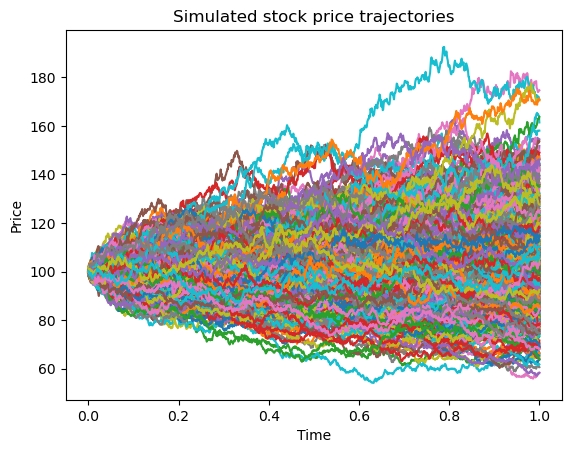

In [129]:
# Plot of the simulated trajectories

for i in range(len(S.T)):
    plt.plot(T_vec, S.T[i][1:])
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Simulated stock price trajectories")
plt.show()

In [131]:
# Compute the mean of each trajectory
Av = np.average(S.T, axis = 1)

# Compute the final payoff for each simulated trajectory

mc_a_call = np.exp(-r*T)*np.mean( np.maximum(Av - K, 0))
mc_a_put = np.exp(-r*T)*np.mean( np.maximum(K-Av, 0))
print("Simulated Call price: {}".format(mc_a_call))
print("Simulated Put price: {}".format(mc_a_put))

Simulated Call price: 4.989107523118259
Simulated Put price: 4.133019694625001
